In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas

# Reading the ROOT file

In [35]:
test = uproot.open("result.root")['rawevent']

In [ ]:
pos = events.array("pos")
detID = events.array("detectorID")

In [40]:
eventsdf = events.pandas.df(flatten=False)

In [41]:
eventsdf

,DST.SRawEvent.fUniqueID,DST.SRawEvent.fBits,DST.SRawEvent.fRunID,DST.SRawEvent.fEventID,DST.SRawEvent.fSpillID,DST.SRawEvent.fTriggerBits,DST.SRawEvent.fTargetPos,DST.SRawEvent.fTurnID,DST.SRawEvent.fRFID,DST.SRawEvent.fIntensity[33][0],...,DST.SRawEvent.fTriggerHits,DST.SRawEvent.fTriggerHits.fUniqueID,DST.SRawEvent.fTriggerHits.fBits,DST.SRawEvent.fTriggerHits.index,DST.SRawEvent.fTriggerHits.detectorID,DST.SRawEvent.fTriggerHits.elementID,DST.SRawEvent.fTriggerHits.tdcTime,DST.SRawEvent.fTriggerHits.driftDistance,DST.SRawEvent.fTriggerHits.pos,DST.SRawEvent.fTriggerHits.flag
entry,,,,,,,,,,,,,,,,,,,,,
0,0,50331648,28300,6640,0,2,6,0,0,0,...,14,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[33554432, 33554432, 33554432, 33554432, 33554...","[194, 195, 197, 199, 202, 203, 204, 205, 206, ...","[32, 40, 32, 32, 31, 45, 45, 37, 39, 39, 39, 3...","[6, 9, 18, 14, 4, 14, 13, 13, 15, 14, 9, 18, 1...","[760.0, 777.0, 778.0, 781.0, 762.0, 779.0, 775...","[0.0, 8.8e-44, 8.8e-44, 8.8e-44, 0.0, 8.8e-44,...","[1e-45, 3.4e-44, 3.4e-44, 3.4e-44, 1e-45, 4.36...","[0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2]"
1,0,50331648,28300,6650,0,2,6,0,0,0,...,11,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[33554432, 33554432, 33554432, 33554432, 33554...","[615, 616, 620, 623, 624, 625, 626, 628, 629, ...","[32, 32, 32, 45, 37, 37, 39, 31, 31, 31, 31]","[19, 18, 14, 13, 13, 12, 14, 18, 14, 11, 12]","[748.0, 746.0, 783.0, 778.0, 774.0, 779.0, 778...","[0.0, 0.0, 8.8e-44, 8.8e-44, 8.8e-44, 8.8e-44,...","[1e-45, 1e-45, 3.4e-44, 4.388851e-17, 4.388919...","[0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2]"
2,0,50331648,28300,6660,0,2,6,0,0,0,...,11,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[33554432, 33554432, 33554432, 33554432, 33554...","[943, 949, 950, 951, 952, 954, 955, 956, 957, ...","[32, 37, 37, 39, 39, 31, 31, 45, 45, 45, 39]","[5, 11, 5, 15, 3, 12, 10, 4, 4, 13, 13]","[747.0, 779.0, 776.0, 779.0, 777.0, 780.0, 776...","[0.0, 8.8e-44, 8.8e-44, 8.8e-44, 8.8e-44, 8.8e...","[1e-45, 4.4037693e-17, 4.403817e-17, 4.4038646...","[0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]"
3,0,50331648,28300,6670,0,2,6,0,0,0,...,42,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[33554432, 33554432, 33554432, 33554432, 33554...","[1308, 1310, 1312, 1313, 1314, 1315, 1316, 131...","[38, 38, 32, 32, 46, 46, 38, 40, 32, 32, 32, 3...","[1, 15, 16, 14, 16, 16, 4, 3, 20, 16, 15, 13, ...","[734.0, 762.0, 763.0, 761.0, 765.0, 766.0, 775...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.8e-44, 8.8e-4...","[1e-45, 1e-45, 1e-45, 1e-45, 1e-45, 1e-45, 3.4...","[0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, ..."
4,0,50331648,28300,6680,0,2,6,0,0,0,...,13,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[33554432, 33554432, 33554432, 33554432, 33554...","[2366, 2367, 2368, 2369, 2370, 2372, 2373, 237...","[46, 38, 38, 40, 40, 32, 32, 46, 46, 46, 32, 3...","[4, 12, 5, 14, 3, 13, 10, 4, 14, 14, 20, 12, 1]","[776.0, 780.0, 779.0, 780.0, 778.0, 780.0, 779...","[8.8e-44, 8.8e-44, 8.8e-44, 8.8e-44, 8.8e-44, ...","[3.4e-44, 3.4e-44, 3.4e-44, 3.4e-44, 3.4e-44, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18513,0,50331648,28300,331600,1393840,2,1,0,0,0,...,33,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[33554432, 33554432, 33554432, 33554432, 33554...","[26092958, 26092959, 26092961, 26092963, 26092...","[46, 46, 32, 32, 46, 46, 38, 32, 46, 38, 40, 3...","[1, 1, 20, 20, 1, 1, 12, 14, 1, 12, 2, 20, 1, ...","[733.0, 737.0, 733.0, 763.0, 765.0, 776.0, 774...","[0.0, 0.0, 0.0, 0.0, 0.0, 8.8e-44, 8.8e-44, 8....","[1e-45, 1e-45, 1e-45, 1e-45, 1e-45, 3.4e-44, 3...","[0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, ..."
18514,0,50331648,28300,340940,1393841,128,1,0,0,0,...,0,[],[],[],[],[],[],[],[],[]
18515,0,50331648,28300,340950,1393841,128,1,0,0,0,...,0,[],[],[],[],[],[],[],[],[]


# Masking the data

In [43]:
FullMasks = [{} for sub in range(len(detID))] 

In [47]:
for i in range(len(detID)):
    FullMasks[i]["D0"] = np.logical_and(detID[i] >= 1, detID[i] <= 6)
    FullMasks[i]["D1"] = np.logical_and(detID[i] >= 7, detID[i] <= 12)
    FullMasks[i]["D2"] = np.logical_and(detID[i] >= 13, detID[i] <= 18)
    FullMasks[i]["D3p"] = np.logical_and(detID[i] >= 19, detID[i] <= 24)
    FullMasks[i]["D3m"] = np.logical_and(detID[i] >= 25, detID[i] <= 30)
    FullMasks[i]["H1B"] = np.logical_and(detID[i] > 30, detID[i] < 32)
    FullMasks[i]["H1T"] = np.logical_and(detID[i] > 31, detID[i] < 33)
    FullMasks[i]["H1L"] = np.logical_and(detID[i] > 32, detID[i] < 34)
    FullMasks[i]["H1R"] = np.logical_and(detID[i] > 33, detID[i] < 35)
    FullMasks[i]["H2L"] = np.logical_and(detID[i] > 34, detID[i] < 36)
    FullMasks[i]["H2R"] = np.logical_and(detID[i] > 35, detID[i] < 37)
    FullMasks[i]["H2B"] = np.logical_and(detID[i] > 36, detID[i] < 38)
    FullMasks[i]["H2T"] = np.logical_and(detID[i] > 37, detID[i] < 39)
    FullMasks[i]["H3B"] = np.logical_and(detID[i] > 38, detID[i] < 40)
    FullMasks[i]["H3T"] = np.logical_and(detID[i] > 39, detID[i] < 41)
    FullMasks[i]["H4Y1L"] = np.logical_and(detID[i] > 40, detID[i] < 42)
    FullMasks[i]["H4Y1R"] = np.logical_and(detID[i] > 41, detID[i] < 43)
    FullMasks[i]["H4Y2L"] = np.logical_and(detID[i] > 42, detID[i] < 44)
    FullMasks[i]["H4Y2R"] = np.logical_and(detID[i] > 43, detID[i] < 45)
    FullMasks[i]["H4B"] = np.logical_and(detID[i] > 44, detID[i] < 46)
    FullMasks[i]["H4T"] = np.logical_and(detID[i] > 45, detID[i] < 47)
    FullMasks[i]["proto-tubes"] = np.logical_and(detID[i] >= 47, detID[i] <= 54)
    FullMasks[i]["DP1"] = np.logical_and(detID[i] >= 55, detID[i] < 58)
    FullMasks[i]["D21"] = np.logical_and(detID[i] >= 59, detID[i] < 64)

In [49]:
# check if the length of a multi-ID detector == length of single-ID detector:

len(FullMasks[0]["D1"]) == len(FullMasks[0]["H3T"])

True

# Plotting Hits/Event

In [50]:
# initializing detector lists to zero_like
D0 = np.zeros_like(detID)
D1 = np.zeros_like(detID)
D2 = np.zeros_like(detID)
D3p = np.zeros_like(detID)
D3m = np.zeros_like(detID)
H1B = np.zeros_like(detID)
H1T = np.zeros_like(detID)
H1L = np.zeros_like(detID)
H1R = np.zeros_like(detID)
H2L = np.zeros_like(detID)
H2R = np.zeros_like(detID)
H2B = np.zeros_like(detID)
H2T = np.zeros_like(detID)
H3B = np.zeros_like(detID)
H3T = np.zeros_like(detID)
H4Y1L = np.zeros_like(detID)
H4Y1R = np.zeros_like(detID)
H4Y2L = np.zeros_like(detID)
H4Y2R = np.zeros_like(detID)
H4B = np.zeros_like(detID)
H4T = np.zeros_like(detID)
proto_tubes = np.zeros_like(detID)
DP1 = np.zeros_like(detID)
DP2 = np.zeros_like(detID)

In [51]:
for i in range(len(FullMasks)):
    D0[i] = np.count_nonzero(FullMasks[i].get("D0")==True)

for i in range(len(FullMasks)):
    D1[i] = np.count_nonzero(FullMasks[i].get("D1")==True)

for i in range(len(FullMasks)):
    D2[i] = np.count_nonzero(FullMasks[i].get("D2")==True)
    
for i in range(len(FullMasks)):
    D3p[i] = np.count_nonzero(FullMasks[i].get("D3p")==True)
    
for i in range(len(FullMasks)):
    D3m[i] = np.count_nonzero(FullMasks[i].get("D3m")==True)


In [52]:
for i in range(len(FullMasks)):
    H1B[i] = np.count_nonzero(FullMasks[i].get("H1B")==True)

In [53]:
for i in range(len(FullMasks)):
    H1T[i] = np.count_nonzero(FullMasks[i].get("H1T")==True)

In [54]:
for i in range(len(FullMasks)):
    H1L[i] = np.count_nonzero(FullMasks[i].get("H1L")==True)

In [55]:
for i in range(len(FullMasks)):
    H1R[i] = np.count_nonzero(FullMasks[i].get("H1R")==True)

In [56]:
for i in range(len(FullMasks)):
    H2L[i] = np.count_nonzero(FullMasks[i].get("H2L")==True)

In [57]:
for i in range(len(FullMasks)):
    H2R[i] = np.count_nonzero(FullMasks[i].get("H2R")==True)

In [58]:
for i in range(len(FullMasks)):
    H2B[i] = np.count_nonzero(FullMasks[i].get("H2B")==True)

In [59]:
for i in range(len(FullMasks)):
    H2T[i] = np.count_nonzero(FullMasks[i].get("H2T")==True)

In [60]:
for i in range(len(FullMasks)):
    H3B[i] = np.count_nonzero(FullMasks[i].get("H3B")==True)

In [61]:
for i in range(len(FullMasks)):
    H3T[i] = np.count_nonzero(FullMasks[i].get("H3T")==True)

In [62]:
for i in range(len(FullMasks)):
    H4Y1L[i] = np.count_nonzero(FullMasks[i].get("H4Y1L")==True)

In [63]:
for i in range(len(FullMasks)):
    H4Y1R[i] = np.count_nonzero(FullMasks[i].get("H4Y1R")==True)

In [64]:
for i in range(len(FullMasks)):
    H4Y2L[i] = np.count_nonzero(FullMasks[i].get("H4Y2L")==True)

In [65]:
for i in range(len(FullMasks)):
    H4Y2R[i] = np.count_nonzero(FullMasks[i].get("H4Y2R")==True)

In [66]:
for i in range(len(FullMasks)):
    H4B[i] = np.count_nonzero(FullMasks[i].get("H4B")==True)

In [67]:
for i in range(len(FullMasks)):
    H4T[i] = np.count_nonzero(FullMasks[i].get("H4T")==True)

In [68]:
for i in range(len(FullMasks)):
    proto_tubes[i] = np.count_nonzero(FullMasks[i].get("proto-tubes")==True)

In [69]:
for i in range(len(FullMasks)):
    DP1[i] = np.count_nonzero(FullMasks[i].get("DP1")==True)

In [70]:
for i in range(len(FullMasks)):
    DP2[i] = np.count_nonzero(FullMasks[i].get("DP2")==True)

## hit_event list

In [73]:
hit_event = [D0, D1, D2, D3p, D3m, H1B, H1T, H1L, H1R, H2L, 
             H2R, H2B, H2T, H3B, H3T, H4Y1L, H4Y1R, H4Y2L, H4Y2R, 
             H4B, H4T, proto_tubes, DP1, DP2]
hit_event_names = ["D0", "D1", "D2", "D3p", "D3m", "H1B", "H1T", "H1L", "H1R", 
                   "H2L", "H2R", "H2B", "H2T", "H3B", "H3T", "H4Y1L", "H4Y1R", 
                   "H4Y2L", "H4Y2R", "H4B", "H4T", "proto_tubes", "DP1", "DP2"]

## plotting

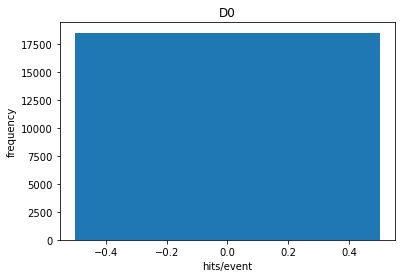

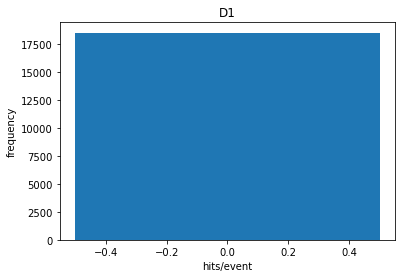

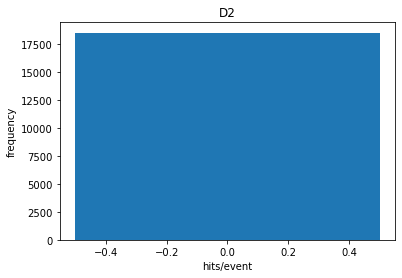

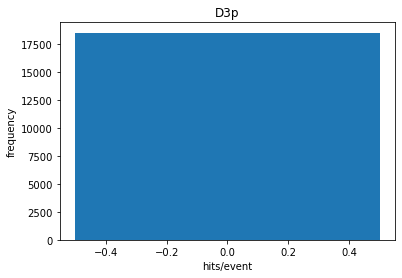

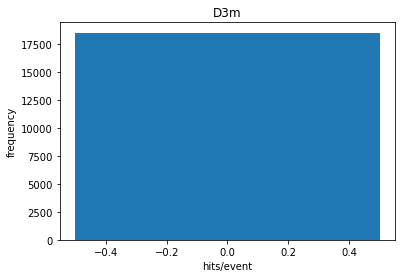

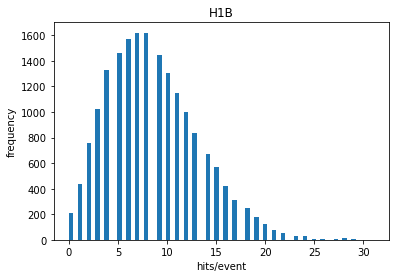

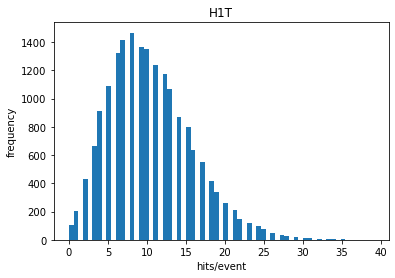

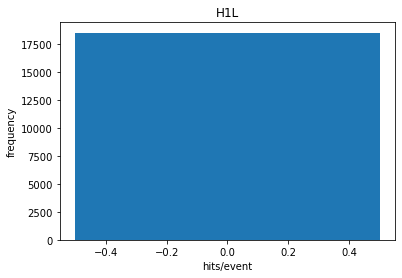

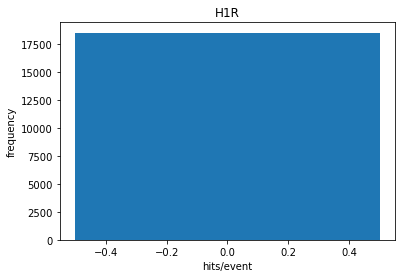

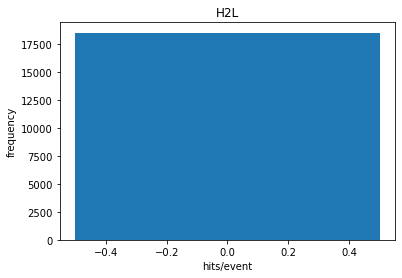

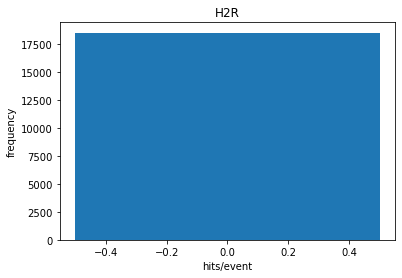

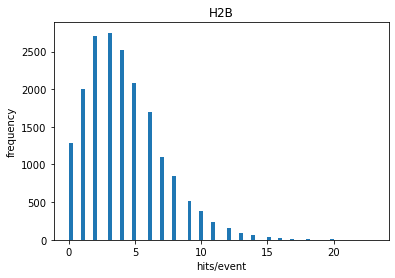

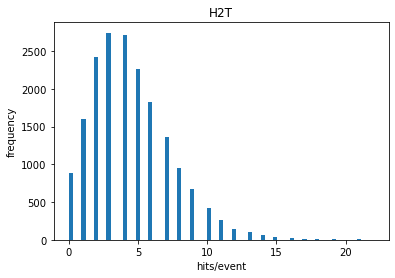

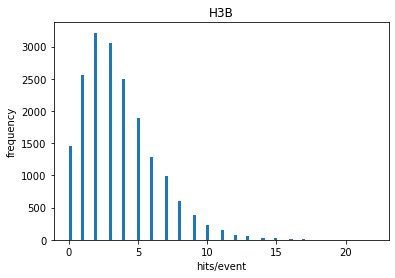

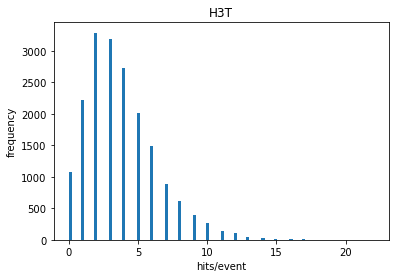

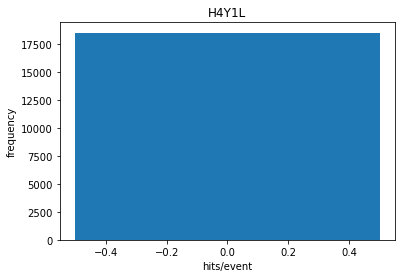

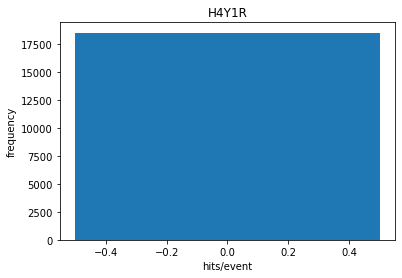

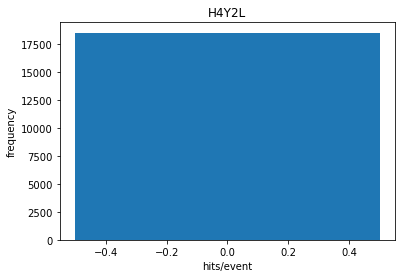

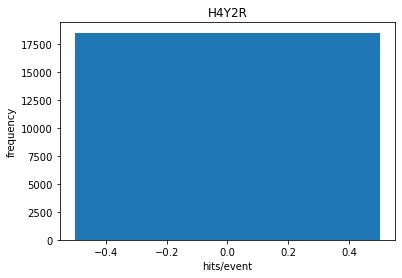

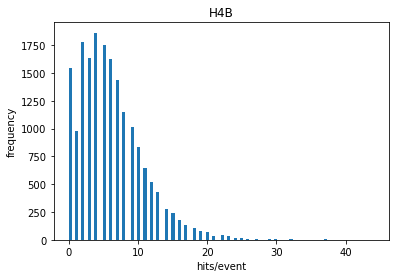

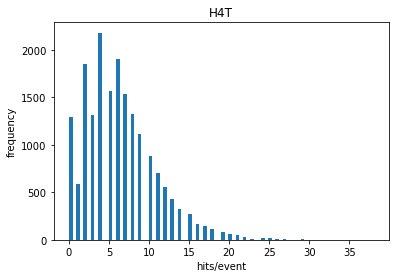

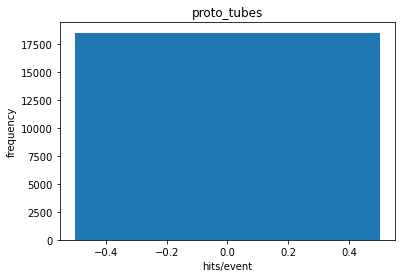

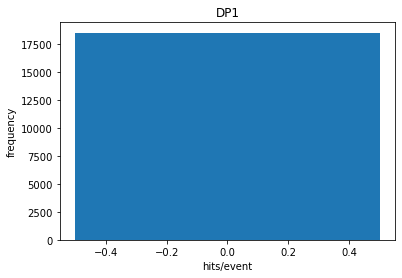

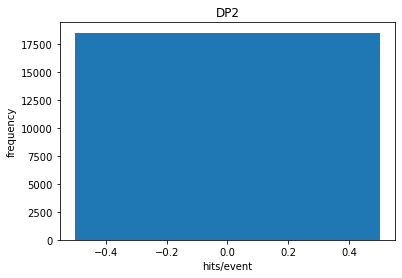

<Figure size 432x288 with 0 Axes>

In [74]:
# simple for loop to plot
for i in range(len(hit_event)):
    plt.hist(hit_event[i],bins='auto')
    plt.xlabel("hits/event")
    plt.ylabel("frequency")
    plt.title(hit_event_names[i])
    plt.show()
    plt.clf()

In [75]:
D0

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

## attempting nicer binning

In [76]:
HitEvent = [D0, 
D1, 
D2, 
D3p, 
D3m,  
proto_tubes, 
DP1, 
DP2]

HitEventHodos = [
H1B,
H1T, 
H1L, 
H1R, 
H2L, 
H2R, 
H2B, 
H2T, 
H3B, 
H3T, 
H4Y1L, 
H4Y1R, 
H4Y2L, 
H4Y2R, 
H4B, 
H4T 
]

HitEventNames = ['D0', 
'D1', 
'D2', 
'D3p', 
'D3m', 
'proto_tubes', 
'DP1', 
'DP2'
]

HitEventHodosNames = [
'H1B',
'H1T', 
'H1L', 
'H1R', 
'H2L', 
'H2R', 
'H2B', 
'H2T', 
'H3B', 
'H3T', 
'H4Y1L', 
'H4Y1R', 
'H4Y2L', 
'H4Y2R', 
'H4B', 
'H4T' 
]

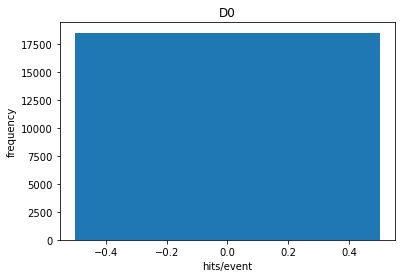

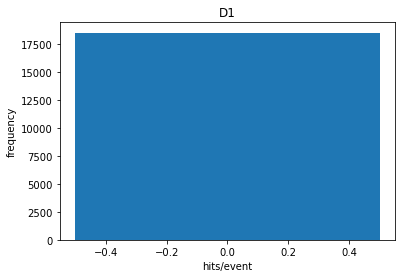

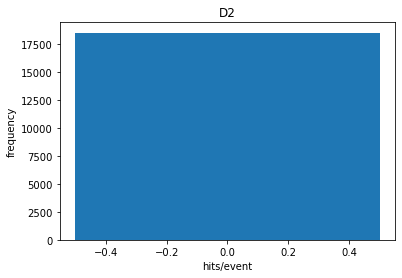

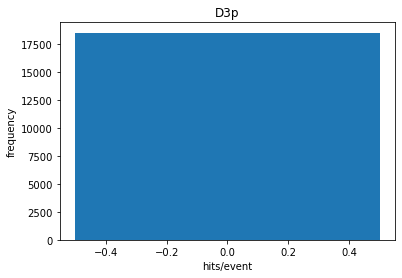

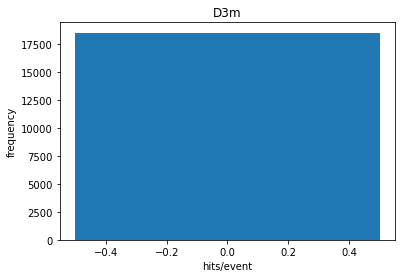

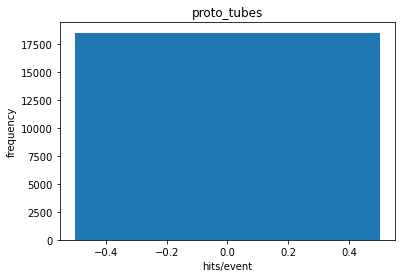

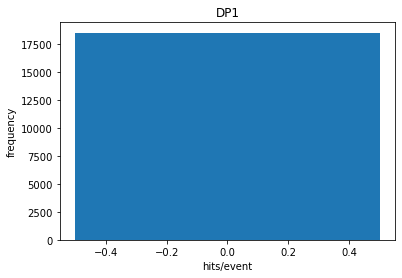

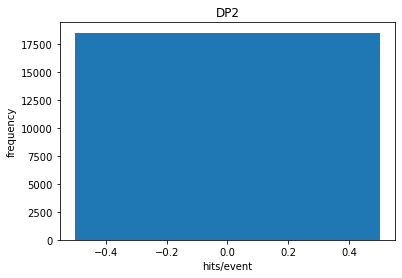

In [77]:
for i in range(len(HitEvent)):
    plt.hist(HitEvent[i],bins='auto')
    plt.xlabel("hits/event")
    plt.ylabel("frequency")
    plt.title(HitEventNames[i])
    #plt.savefig('D:\\Fermilab\\2017Data\\hit-events-v2\\' + HitEventNames[i] + '.jpg', dpi=300)
    plt.show()

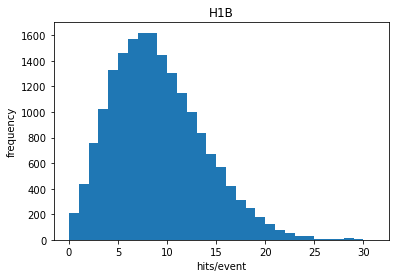

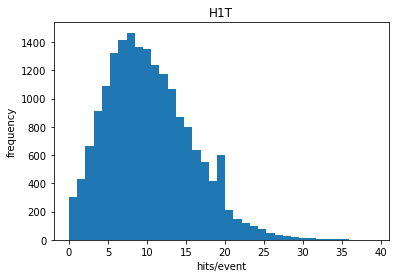

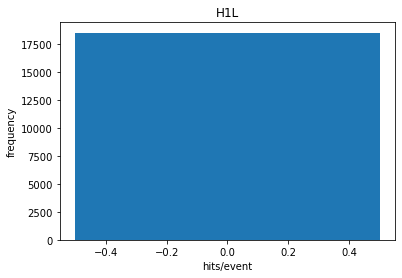

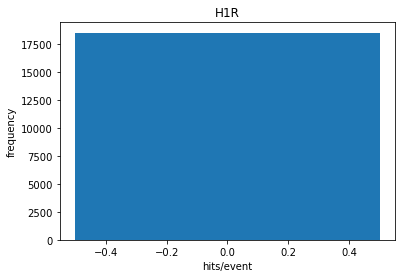

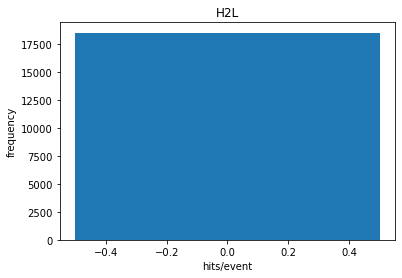

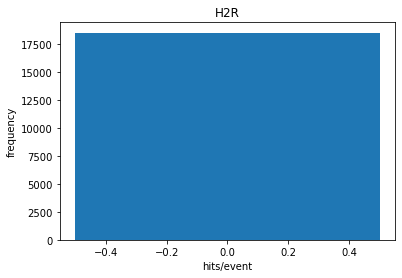

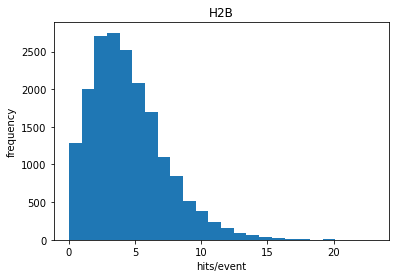

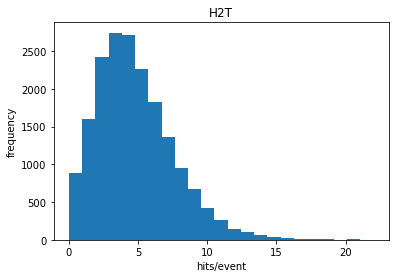

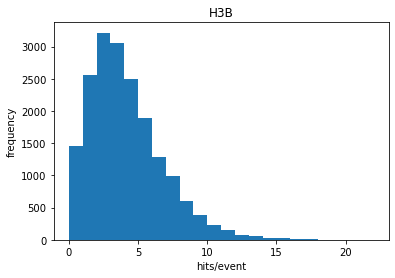

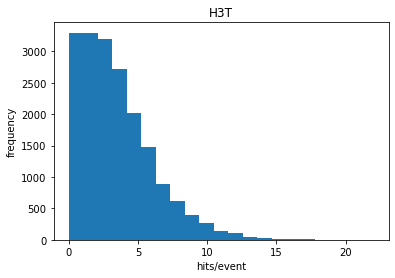

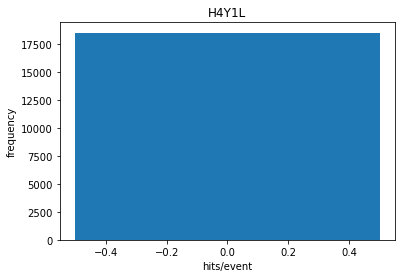

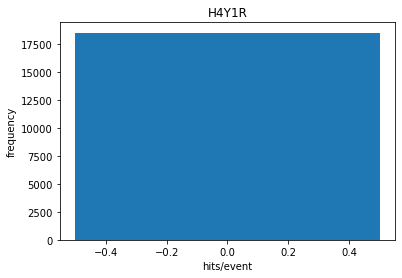

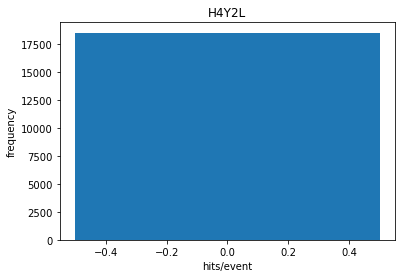

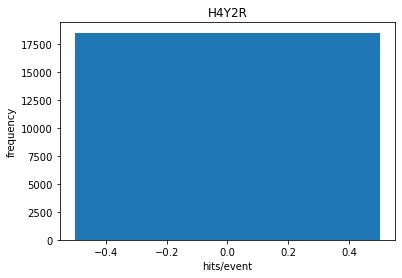

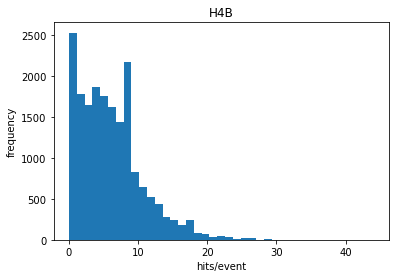

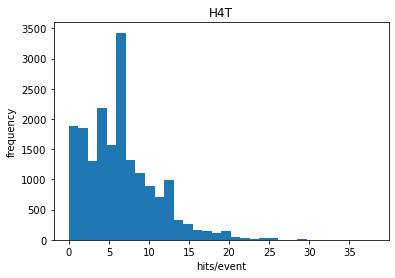

In [78]:
for i in range(len(HitEventHodos)):
    plt.hist(HitEventHodos[i],bins=len(np.unique(HitEventHodos[i])))
    plt.xlabel("hits/event")
    plt.ylabel("frequency")
    plt.title(HitEventHodosNames[i])
    #plt.savefig('D:\\Fermilab\\2017Data\\hit-events-v2\\' + HitEventHodosNames[i] + '.jpg', dpi=300)
    plt.show()